/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0313
Epoch 2/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0079
Epoch 3/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0070
Epoch 4/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0065
Epoch 5/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0059
Epoch 6/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0060
Epoch 7/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0055
Epoch 8/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0056
Epoch 9/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0056
Epoch 10/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0053
Epoch 11/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056
Epoch 12/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053
Epoch 13/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0055
Epoch 14/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054
Epoch 15/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0049
Epoch 16/30
73/73 ━

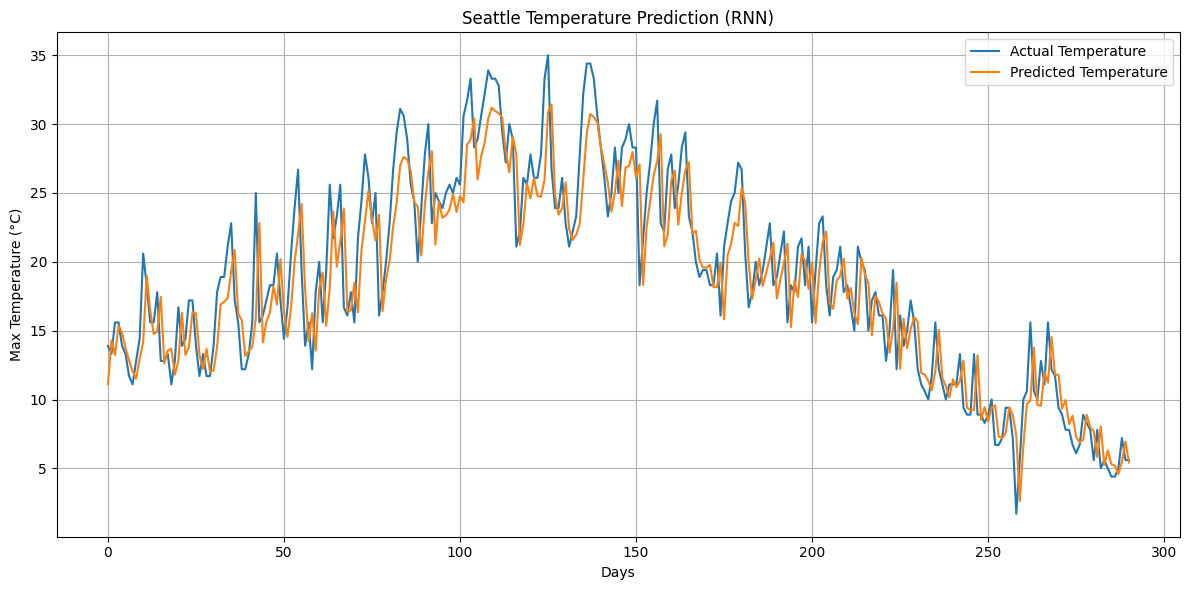

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Step 1: Load CSV
df = pd.read_csv('seattle-weather.csv')

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Step 2: Use 'temp_max' for prediction
temps = df['temp_max'].values.reshape(-1, 1)

# Normalize temperature data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_temps = scaler.fit_transform(temps)

# Step 3: Create sequences (use past 7 days to predict next day)
sequence_length = 7
X, y = [], []

for i in range(sequence_length, len(scaled_temps)):
    X.append(scaled_temps[i-sequence_length:i])
    y.append(scaled_temps[i])

X, y = np.array(X), np.array(y)

# Reshape for RNN: (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Step 4: Split into train and test sets (80% train, 20% test)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Step 5: Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=64, activation='tanh', input_shape=(X.shape[1], 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Step 6: Train the model
model.fit(X_train, y_train, epochs=30, batch_size=16, verbose=1)

# Step 7: Predict
y_pred = model.predict(X_test)

# Inverse transform to get original temperature scale
y_test_actual = scaler.inverse_transform(y_test)
y_pred_actual = scaler.inverse_transform(y_pred)

# Step 8: Evaluation
mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, y_pred_actual)
r2 = r2_score(y_test_actual, y_pred_actual)

print(f"📊 Evaluation Metrics:")
print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ MAE: {mae:.2f}")
print(f"✅ R² Score: {r2:.2f}")

# Step 9: Plotting actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label='Actual Temperature')
plt.plot(y_pred_actual, label='Predicted Temperature')
plt.title("Seattle Temperature Prediction (RNN)")
plt.xlabel("Days")
plt.ylabel("Max Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 1: Load the data
df = pd.read_csv("seattle-weather.csv")

# Fix the date format issue
df['date'] = pd.to_datetime(df['date'])  # Auto-detect format

# Step 2: Use 'temp_max' column
temps = df['temp_max'].values.reshape(-1, 1)

# Step 3: Normalize temperatures
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_temps = scaler.fit_transform(temps)

# Step 4: Create sequences (7 days → next day)
sequence_length = 7
X, y = [], []

for i in range(sequence_length, len(scaled_temps)):
    X.append(scaled_temps[i-sequence_length:i])
    y.append(scaled_temps[i])

X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))  # LSTM expects 3D input

# Step 5: Split into train and test
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Step 6: Build LSTM model
model = Sequential()
model.add(LSTM(units=64, return_sequences=False, input_shape=(X.shape[1], 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Step 7: Train the model
model.fit(X_train, y_train, epochs=30, batch_size=16, verbose=1)

# Step 8: Predict
y_pred = model.predict(X_test)

# Step 9: Inverse transform
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test)

# Step 10: Evaluation
mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, y_pred_actual)
r2 = r2_score(y_test_actual, y_pred_actual)

print("📊 Evaluation Metrics:")
print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ MAE : {mae:.2f}")
print(f"✅ R²  : {r2:.2f}")

# Step 11: Plot
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Temp')
plt.plot(y_pred_actual, label='Predicted Temp')
plt.title("Seattle Max Temperature Prediction using LSTM")
plt.xlabel("Days")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0780
Epoch 2/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0101
Epoch 3/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0096
Epoch 4/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0087
Epoch 5/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0083
Epoch 6/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0088
Epoch 7/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0094
Epoch 8/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0084
Epoch 9/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0085
Epoch 10/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0078
Epoch 11/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0077
Epoch 12/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0074
Epoch 13/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0076
Epoch 14/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0070
Epoch 15/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0078
Epoch 16/30
73/73 ━━━━━━━━━━━━

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Custom Evaluation Metrics
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# Step 1: Load data
df = pd.read_csv("seattle-weather.csv")

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Step 2: Use 'temp_max'
temps = df['temp_max'].values.reshape(-1, 1)

# Step 3: Normalize
scaler = MinMaxScaler()
scaled_temps = scaler.fit_transform(temps)

# Step 4: Sequence creation
seq_len = 7
X, y = [], []

for i in range(seq_len, len(scaled_temps)):
    X.append(scaled_temps[i-seq_len:i])
    y.append(scaled_temps[i])

X, y = np.array(X), np.array(y)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Step 5: Split data
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Step 6: Build LSTM model
model = Sequential([
    LSTM(units=64, input_shape=(X.shape[1], 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Step 7: Train
model.fit(X_train, y_train, epochs=30, batch_size=16, verbose=1)

# Step 8: Predict
y_pred = model.predict(X_test)

# Step 9: Reverse scale
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test)

# Step 10: Evaluation
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
mae = mean_absolute_error(y_test_actual, y_pred_actual)
r2 = r2_score(y_test_actual, y_pred_actual)
mape_val = mape(y_test_actual, y_pred_actual)
smape_val = smape(y_test_actual, y_pred_actual)

print("\n📊 Evaluation Metrics:")
print(f"✅ RMSE  : {rmse:.2f}")
print(f"✅ MAE   : {mae:.2f}")
print(f"✅ R²    : {r2:.2f}")
print(f"✅ MAPE  : {mape_val:.2f}%")
print(f"✅ SMAPE : {smape_val:.2f}%")

# Step 11: Plot
plt.figure(figsize=(14, 6))
plt.plot(y_test_actual, label='Actual Temp', color='blue')
plt.plot(y_pred_actual, label='Predicted Temp', color='red')
plt.title('LSTM Temperature Forecast - Seattle')
plt.xlabel('Days')
plt.ylabel('Max Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0786
Epoch 2/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0088
Epoch 3/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0093
Epoch 4/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0099
Epoch 5/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0086
Epoch 6/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0080
Epoch 7/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0084
Epoch 8/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0076
Epoch 9/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0080
Epoch 10/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0086
Epoch 11/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076
Epoch 12/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0072
Epoch 13/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0070
Epoch 14/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069
Epoch 15/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0064
Epoch 16/30
73/73 ━━━━━━━━━━━━